# SALib Validation Files
This outputs files from SALib delta analysis with Borehole function.

## Set Up

In [1]:
import SALib

from SALib.sample import latin
from SALib.analyze import delta
from SALib.test_functions import Ishigami

from scipy.stats import norm, gaussian_kde, rankdata

import numpy as np
import csv

from SALib.util import read_param_file, ResultDict

#extra plotting
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Define the Borehole Function

In [2]:
def borehole_evaluate(values):
    
    Y = np.zeros([values.shape[0]])
    
    for i, X in enumerate(values):
        
        rw =    X[0] # radius of borehole (m)
        r =     X[1] # radius of influence (m)
        Tu =    X[2] # transmissivity of upper aquifer (m2/yr)
        Hu =    X[3] # potentiometric head of upper aquifer (m)
        Tl =    X[4] # transmissivity of lower aquifer (m2/yr)
        Hl =    X[5] # potentiometric head of lower aquifer (m)
        L =     X[6] # length of borehole (m)
        Kw =    X[7] # hydraulic conductivity of borehole (m/yr)

        l = np.log(r/rw)
        num = 2 * np.pi * Tu * (Hu - Hl)
        denom = l * (1 + ((2 * L * Tu) / (l * (rw**2) * Kw)) + (Tu/Tl))
        Y[i] = num / denom
        
        Y[i] 

    return Y

## SALib

In [3]:
# SHORT EXAMPLE
            
problem = {
    'num_vars': 8,
    'names': ['rw', 'r', 'Tu', 'Hu', 'Tl', 'Hl', 'L', 'Kw'],
    'bounds': [[0.10, 0.0161812],
               [7.71, 1.0056],
               [63070, 115600],
               [990, 1110],
               [63.1, 116],
               [700, 820],
               [1120, 1680],
               [9855, 12045]
              ],
    'dists': ['norm','lognorm', 'unif', 'unif','unif','unif','unif','unif']
}


# Generate samples
param_values = latin.sample(problem, 1000)

# Run model (example)
Y = borehole_evaluate(param_values)

# Perform analysis
Si = delta.analyze(problem, param_values, Y, print_to_console=True)

# Print the first-order sensitivity indices
print(Si['S1'])


       delta  delta_conf        S1   S1_conf
rw  0.378200    0.022837  0.600316  0.040560
r   0.020196    0.017756  0.004560  0.011011
Tu  0.044509    0.016549  0.003579  0.009642
Hu  0.103038    0.021351  0.084262  0.029154
Tl  0.034724    0.014699  0.001592  0.008838
Hl  0.098550    0.022292  0.080894  0.031038
L   0.116196    0.020287  0.116515  0.039921
Kw  0.068379    0.021485  0.032263  0.022377
[0.60031586 0.00455952 0.00357927 0.08426205 0.0015916  0.08089422
 0.11651479 0.03226282]


In [4]:
# CONFIDENCE INTERVALS

print (Si['S1_conf'])
print (Si['delta_conf'])

[0.04056015 0.01101066 0.00964249 0.02915427 0.00883761 0.03103822
 0.03992102 0.02237717]
[0.02283746 0.01775562 0.01654909 0.02135145 0.01469876 0.02229227
 0.02028699 0.0214855 ]


### 1. Sampling

In [5]:
# Define the model inputs
            
problem = {
    'num_vars': 8,
    'names': ['rw', 'r', 'Tu', 'Hu', 'Tl', 'Hl', 'L', 'Kw'],
    'bounds': [[0.10, 0.0161812],
               [7.71, 1.0056],
               [63070, 115600],
               [990, 1110],
               [63.1, 116],
               [700, 820],
               [1120, 1680],
               [9855, 12045]
              ],
    'dists': ['norm','lognorm', 'unif', 'unif','unif','unif','unif','unif']
}

N = 1000
D = problem['num_vars']

In [6]:
# Generate samples
param_values = latin.sample(problem, N)

In [7]:
# print csv for comparison
path = "../data/delta/py_borehole/py_samples.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerows(param_values)

(array([853., 106.,  24.,  10.,   3.,   2.,   0.,   1.,   0.,   1.]),
 array([   82.96490541,  6416.12654771, 12749.28819001, 19082.44983231,
        25415.61147461, 31748.77311691, 38081.9347592 , 44415.0964015 ,
        50748.2580438 , 57081.4196861 , 63414.5813284 ]),
 <BarContainer object of 10 artists>)

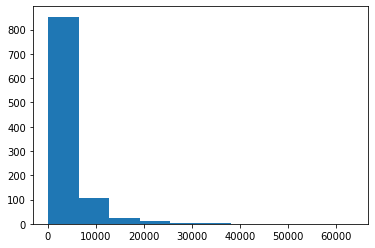

In [8]:
plt.hist(param_values[:,1])

### Sampling Plotting

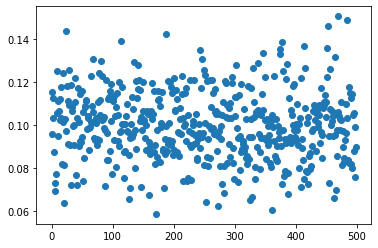

In [9]:
#distribution of sample
delta_sample= {'id': range(500), 'x1': param_values[0:500,0], 'x2': param_values[0:500,1], 'x3': param_values[0:500,2]}
df = pd.DataFrame(delta_sample)
plt.scatter(df['id'], df['x1'])
plt.show()

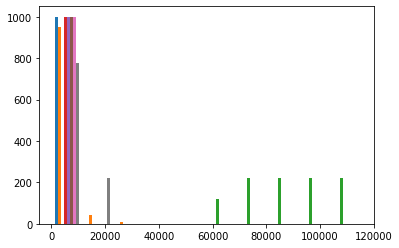

In [10]:
plt.hist(param_values)
plt.show()

### 2. Analyze

In [11]:
# Run model (example)

Y = borehole_evaluate(param_values)

In [12]:
# print csv for comparison

path = "../data/delta/py_borehole/py_borehole.csv"

with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(Y)):
        wr.writerow([Y[i]])

In [13]:
# Perform analysis

Si = delta.analyze(problem,param_values, Y, print_to_console= False, conf_level = 0.95, num_resamples = 1000)

print(Si['delta'])
print(Si['delta_conf'])
print()
print()
print(Si['S1'])
print(Si['S1_conf'])

[0.39325825 0.02673185 0.01768732 0.11852135 0.03127709 0.08480834
 0.08399346 0.04964723]
[0.0227659  0.01426466 0.01381255 0.02222692 0.01571526 0.02080171
 0.01908308 0.01840138]


[0.62408329 0.0020976  0.00063404 0.12569824 0.00710425 0.06504504
 0.07512061 0.01806572]
[0.03850746 0.00758158 0.00794732 0.03424467 0.01315375 0.02989451
 0.02946116 0.01631554]


In [14]:
# variables for indices

firstorder = Si["S1"]
delta = Si["delta"]
firstorder_conf = Si["S1_conf"]
delta_conf = Si["delta_conf"]


In [15]:
# print csv of indices for comparison 
        
path = "../data/delta/py_borehole/py_firstorder.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(firstorder)):
        wr.writerow([firstorder[i]])

path = "../data/delta/py_borehole/py_delta.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(delta)):
        wr.writerow([delta[i]])
        
# print csvs of CIs for comparisons

path = "../data/delta/py_borehole/py_firstorder_conf.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(firstorder_conf)):
        wr.writerow([firstorder_conf[i]])
        
path = "../data/delta/py_borehole/py_delta_conf.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(delta_conf)):
        wr.writerow([delta_conf[i]])
        

### Analyze Plotting

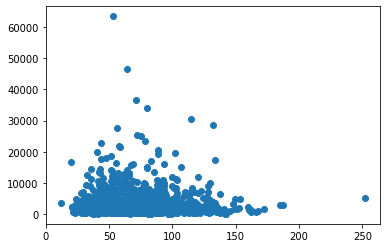

In [16]:
#simple scatter
plt.scatter(Y, param_values[:,1])
plt.show()

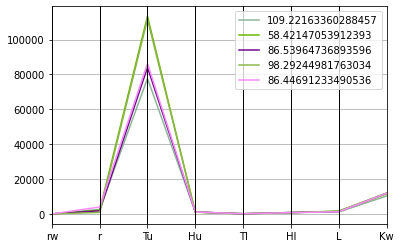

In [17]:
#parallel coordinates (1) 
#http://benalexkeen.com/parallel-coordinates-in-matplotlib/
d = {'output':Y[0:5], 'rw': param_values[0:5,0], 'r': param_values[0:5,1], 'Tu': param_values[0:5,2], 'Hu': param_values[0:5,3], 'Tl': param_values[0:5,4], 'Hl': param_values[0:5,5], 'L': param_values[0:5,6], 'Kw': param_values[0:5,7]}
df = pd.DataFrame(d)
pd.plotting.parallel_coordinates(df, 'output')

plt.show()

In [18]:
#parallel coordinates (2)
#https://stackoverflow.com/questions/23547347/parallel-coordinates-plot-for-continous-data-in-pandas
def parallel_coordinates(frame, class_column, cols=None, ax=None, color=None,
                     use_columns=False, xticks=None, colormap=None,
                     **kwds):
    import matplotlib.pyplot as plt
    import matplotlib as mpl

    n = len(frame)
    class_col = frame[class_column]
    class_min = np.amin(class_col)
    class_max = np.amax(class_col)

    if cols is None:
        df = frame.drop(class_column, axis=1)
    else:
        df = frame[cols]

    used_legends = set([])

    ncols = len(df.columns)

    # determine values to use for xticks
    if use_columns is True:
        if not np.all(np.isreal(list(df.columns))):
            raise ValueError('Columns must be numeric to be used as xticks')
        x = df.columns
    elif xticks is not None:
        if not np.all(np.isreal(xticks)):
            raise ValueError('xticks specified must be numeric')
        elif len(xticks) != ncols:
            raise ValueError('Length of xticks must match number of columns')
        x = xticks
    else:
        x = range(ncols)

    fig = plt.figure()
    ax = plt.gca()

    Colorm = plt.get_cmap(colormap)

    for i in range(n):
        y = df.iloc[i].values
        kls = class_col.iat[i]
        ax.plot(x, y, color=Colorm((kls - class_min)/(class_max-class_min)), **kwds)

    for i in x:
        ax.axvline(i, linewidth=1, color='black')

    ax.set_xticks(x)
    ax.set_xticklabels(df.columns)
    ax.set_xlim(x[0], x[-1])
    ax.legend(loc='upper right')
    ax.grid()

    bounds = np.linspace(class_min,class_max,10)
    cax,_ = mpl.colorbar.make_axes(ax)
    cb = mpl.colorbar.ColorbarBase(cax, cmap=Colorm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%.2f')

    return fig

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


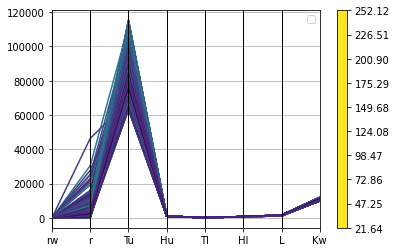

In [19]:
d = {'output':Y[0:500], 'rw': param_values[0:500,0], 'r': param_values[0:500,1], 'Tu': param_values[0:500,2], 'Hu': param_values[0:500,3], 'Tl': param_values[0:500,4], 'Hl': param_values[0:500,5], 'L': param_values[0:500,6], 'Kw': param_values[0:500,7]}
df = pd.DataFrame(d)
parallel_coordinates(df, 'output', colormap="viridis");

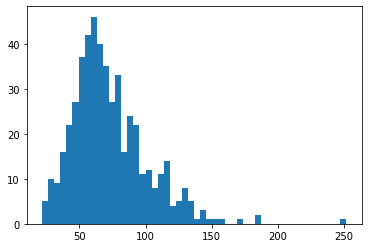

In [20]:
# histogram of output 
plt.hist(df['output'], 50)
plt.show()